In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

df = pd.read_csv(
    "plots/data/ICSE23 Empirical study large-scale training results - bug type data export.csv"
)

In [2]:
df

,evaluation,Model,BOF_accuracy,BOF_precision,BOF_recall,BOF_f1,input_validation_accuracy,input_validation_precision,input_validation_recall,input_validation_f1,...,resource_allocation_free_recall,resource_allocation_free_f1,value_propagation_accuracy,value_propagation_precision,value_propagation_recall,value_propagation_f1,mixed_accuracy,mixed_precision,mixed_recall,mixed_f1
0,BOF,Devign,0.9090,0.3580,0.3135,0.3343,0.9063,0.1954,0.0919,0.1250,...,0.1784,0.1935,0.9067,0.1389,0.0541,0.0778,0.9137,0.3651,0.2486,0.2958
1,BOF,ReGVD,0.9348,0.6989,0.2321,0.3485,0.9302,0.1940,0.0949,0.1275,...,0.0227,0.0426,0.9176,0.3200,0.0857,0.1352,0.9398,0.4401,0.1089,0.1746
2,BOF,ReVeal,0.9157,0.4027,0.3243,0.3593,0.9130,0.2568,0.1027,0.1467,...,0.0919,0.1160,0.8688,0.1442,0.1622,0.1527,0.9004,0.3350,0.3730,0.3529
3,BOF,CodeBert,0.9338,0.6241,0.4019,0.2964,0.9281,0.6579,0.1572,0.0893,...,0.0767,0.0429,0.9233,0.3125,0.0338,0.0179,0.9346,0.6579,0.2679,0.3807
4,BOF,VulbertCNN,0.0751,0.0751,1.0000,0.1397,0.0751,0.0751,1.0000,0.1397,...,1.0000,0.1397,0.0751,0.0751,1.0000,0.1397,NaN,NaN,NaN,NaN
5,BOF,VulBERTa MLP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,BOF,Code2Vec,0.9246,0.0000,0.0000,0.0000,0.9149,0.2632,0.0717,0.1127,...,0.0287,0.0489,0.9144,0.1346,0.0251,0.0423,0.9246,0.0000,0.0000,0.0000
7,BOF,PLBART,0.9359,0.6010,0.4357,0.5052,0.9246,0.4545,0.0179,0.0344,...,0.0214,0.0387,0.9185,0.1471,0.0179,0.0318,0.9346,0.7432,0.1964,0.3107
8,BOF,LineVul,0.9735,0.8339,0.8071,0.8203,0.9659,0.8525,0.6607,0.7445,...,0.6286,0.7184,0.9633,0.8824,0.5893,0.7066,0.9772,0.8884,0.7964,0.8399
9,input_validation,Devign,0.9254,0.1786,0.1538,0.1653,0.9431,0.3333,0.1846,0.2376,...,0.0923,0.0863,0.9468,0.3333,0.1077,0.1628,0.9313,0.2200,0.1692,0.1913


In [3]:
df = df[df["Model"].isin(("LineVul", "CodeBert"))]
df = df[["evaluation", "Model"] + [c for c in df.columns if c.endswith("_f1")]]
df = df.rename(columns={c: c[:-3] for c in df.columns if c.endswith("_f1")})
df

,evaluation,Model,BOF,input_validation,privilege_escalation_authorization,resource_allocation_free,value_propagation,mixed
3,BOF,CodeBert,0.2964,0.0893,0.0643,0.0429,0.0179,0.3807
8,BOF,LineVul,0.8203,0.7445,0.7093,0.7184,0.7066,0.8399
12,input_validation,CodeBert,0.1095,0.2336,0.1022,0.0292,0.0073,0.3707
17,input_validation,LineVul,0.6593,0.7953,0.7382,0.7210,0.7111,0.8352
21,privilege_escalation_authorization,CodeBert,0.0188,0.0438,0.2938,0.0063,0.0063,0.2981
26,privilege_escalation_authorization,LineVul,0.7687,0.7456,0.8092,0.7420,0.7455,0.8523
30,resource_allocation_free,CodeBert,0.0284,0.0341,0.0114,0.1420,0.0000,0.1731
35,resource_allocation_free,LineVul,0.7683,0.7419,0.7379,0.7796,0.7616,0.8066
39,value_propagation,CodeBert,0.0543,0.0000,0.0543,0.0326,0.2283,0.3937
44,value_propagation,LineVul,0.8377,0.8191,0.8068,0.8362,0.8914,0.8901


In [5]:
melt_df = pd.melt(
    df,
    id_vars="Model",
    value_vars=[c for c in df.columns if c not in ("evaluation", "Model")],
    ignore_index=False,
).rename(columns={"variable": "training", "value": "f1"})
melt_df

,Model,training,f1
3,CodeBert,BOF,0.2964
8,LineVul,BOF,0.8203
12,CodeBert,BOF,0.1095
17,LineVul,BOF,0.6593
21,CodeBert,BOF,0.0188
...,...,...,...
35,LineVul,mixed,0.8066
39,CodeBert,mixed,0.3937
44,LineVul,mixed,0.8901
48,CodeBert,mixed,0.3275


In [6]:
df = melt_df.join(df[["evaluation"]])
df = df.replace({
    "BOF": "Buffer overflow",
    "input_validation": "Input validation error",
    "privilege_escalation_authorization": "Privilege escalation",
    "resource_allocation_free": "Resource error",
    "value_propagation": "Value error",
    "mixed": "All bug types",
})
df["f1"] *= 100
df

,Model,training,f1,evaluation
3,CodeBert,Buffer overflow,29.64,Buffer overflow
3,CodeBert,Input validation error,8.93,Buffer overflow
3,CodeBert,Privilege escalation,6.43,Buffer overflow
3,CodeBert,Resource error,4.29,Buffer overflow
3,CodeBert,Value error,1.79,Buffer overflow
...,...,...,...,...
53,LineVul,Input validation error,76.17,All bug types
53,LineVul,Privilege escalation,75.12,All bug types
53,LineVul,Resource error,75.00,All bug types
53,LineVul,Value error,74.86,All bug types


In [4]:
from utils.data import *
from utils.myplot import *

In [6]:
df=get_result('./log/RQ2test/')

In [7]:
df

,training,evaluation,Model,f1
0,input_validation,buffer_overflow,LineVul,72.390000
1,buffer_overflow,privilege_escalation_authorization,CodeBert,8.376963
2,privilege_escalation_authorization,mixed,LineVul,75.940000
3,input_validation,input_validation,CodeBert,36.571429
4,input_validation,mixed,CodeBert,13.764338
...,...,...,...,...
67,mixed,privilege_escalation_authorization,LineVul,83.390000
68,input_validation,value_propagation_errors,CodeBert,0.000000
69,resource_allocation_free,input_validation,LineVul,70.890000
70,privilege_escalation_authorization,privilege_escalation_authorization,CodeBert,39.823009


In [8]:
df=df[df['Model']=='CodeBert']

In [13]:
df

,training,evaluation,Model,f1
1,buffer_overflow,privilege_escalation_authorization,CodeBert,8.376963
3,input_validation,input_validation,CodeBert,36.571429
4,input_validation,mixed,CodeBert,13.764338
5,value_propagation_errors,privilege_escalation_authorization,CodeBert,1.226994
6,buffer_overflow,resource_allocation_free,CodeBert,5.797101
7,privilege_escalation_authorization,buffer_overflow,CodeBert,12.345679
11,resource_allocation_free,value_propagation_errors,CodeBert,4.040404
15,privilege_escalation_authorization,mixed,CodeBert,16.087388
16,value_propagation_errors,resource_allocation_free,CodeBert,0.000000
18,mixed,input_validation,CodeBert,39.583333


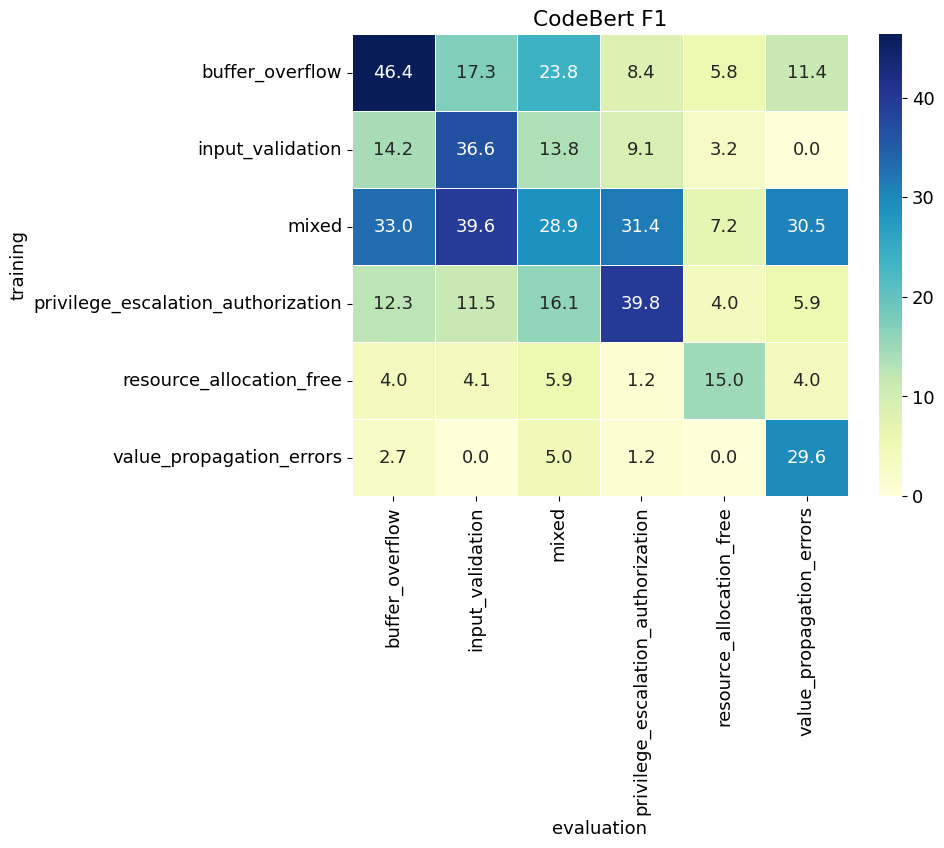

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 使用pivot创建一个新的DataFrame，以创建热力图
pivot_df = df[['training','evaluation','f1']].pivot(index='training', columns='evaluation', values='f1')

# 创建热力图
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt=".1f", linewidths=.5)
plt.title('CodeBert F1')
plt.show()


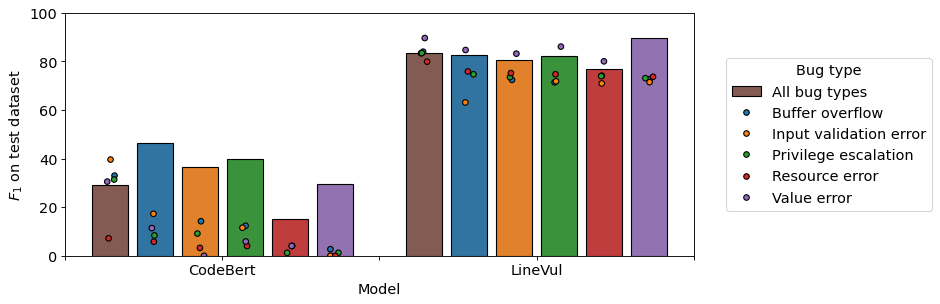

In [5]:
getplot(df)

In [1]:
from transformers import RobertaConfig, RobertaForSequenceClassification, RobertaTokenizer
model=RobertaForSequenceClassification.from_pretrained('/data2/chenlida/model/codebert-base')

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at /data2/chenlida/model/codebert-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [2]:
from peft import PeftModel,get_peft_model,LoraConfig,TaskType

In [3]:
from utils import utils
utils.merge_adapter(model,'saved_models/checkpoint-best-accCODEBERTRQm_bugtype_buffer_overflow','saved_models/checkpoint-best-accCODEBERTRQm_bugtype_input_validation','saved_models/checkpoint-best-accCODEBERTRQm_bugtype_privilege_escalation_authorization','saved_models/checkpoint-best-accCODEBERTRQm_bugtype_resource_allocation_free','saved_models/checkpoint-best-accCODEBERTRQm_bugtype_value_propagation_errors')

In [3]:
peft_config = LoraConfig(
        r=8, lora_alpha=16, lora_dropout=0.05, task_type=TaskType.SEQ_CLS
    )

In [16]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)

base_model.model.roberta.encoder.layer.0.attention.self.query.lora_A.old.weight
base_model.model.roberta.encoder.layer.0.attention.self.query.lora_B.old.weight
base_model.model.roberta.encoder.layer.0.attention.self.value.lora_A.old.weight
base_model.model.roberta.encoder.layer.0.attention.self.value.lora_B.old.weight
base_model.model.roberta.encoder.layer.1.attention.self.query.lora_A.old.weight
base_model.model.roberta.encoder.layer.1.attention.self.query.lora_B.old.weight
base_model.model.roberta.encoder.layer.1.attention.self.value.lora_A.old.weight
base_model.model.roberta.encoder.layer.1.attention.self.value.lora_B.old.weight
base_model.model.roberta.encoder.layer.2.attention.self.query.lora_A.old.weight
base_model.model.roberta.encoder.layer.2.attention.self.query.lora_B.old.weight
base_model.model.roberta.encoder.layer.2.attention.self.value.lora_A.old.weight
base_model.model.roberta.encoder.layer.2.attention.self.value.lora_B.old.weight
base_model.model.roberta.encoder.layer.3

In [4]:
model=get_peft_model(model,peft_config)

In [5]:
model.load_adapter("saved_models/checkpoint-best-accCODEBERTRQm_bugtype_buffer_overflow","qqq")

_IncompatibleKeys(missing_keys=['base_model.model.roberta.embeddings.word_embeddings.weight', 'base_model.model.roberta.embeddings.position_embeddings.weight', 'base_model.model.roberta.embeddings.token_type_embeddings.weight', 'base_model.model.roberta.embeddings.LayerNorm.weight', 'base_model.model.roberta.embeddings.LayerNorm.bias', 'base_model.model.roberta.encoder.layer.0.attention.self.query.weight', 'base_model.model.roberta.encoder.layer.0.attention.self.query.bias', 'base_model.model.roberta.encoder.layer.0.attention.self.query.lora_A.default.weight', 'base_model.model.roberta.encoder.layer.0.attention.self.query.lora_B.default.weight', 'base_model.model.roberta.encoder.layer.0.attention.self.key.weight', 'base_model.model.roberta.encoder.layer.0.attention.self.key.bias', 'base_model.model.roberta.encoder.layer.0.attention.self.value.weight', 'base_model.model.roberta.encoder.layer.0.attention.self.value.bias', 'base_model.model.roberta.encoder.layer.0.attention.self.value.lor

In [11]:
model.set_adapter('new')

In [12]:
model.active_adapter

'new'

In [14]:
model.save_pretrained('trynew')

AttributeError: 'RobertaForSequenceClassification' object has no attribute 'save_lora'